# The race statastics 

This notebook looks at the individual race statistics, look at the results 

In [37]:
import requests
import time
import numpy as np
import matplotlib.pyplot as plt 
import matplotlib

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (20.0, 7.0)

Year = "2020"
race_number = 11

Extracting the results from the race results 

In [38]:
url_Laps = "http://ergast.com/api/f1/%s/%s/laps/1.json" % (Year, race_number)
url_Results = "http://ergast.com/api/f1/%s/%s/results.json" % (Year, race_number)

response = requests.get(url=url_Results)
JSON_Results = response.json()

laps_total = int(JSON_Results["MRData"]["RaceTable"]["Races"][0]["Results"][0]["laps"])
Race_Results = JSON_Results["MRData"]["RaceTable"]["Races"][0]["Results"]

# Finishing order
Extract the finishing order from the data, including the retirements if the diver failed to finish the race

In [39]:
print("Finishing Table for the Race")

for count in range(len(JSON_Results["MRData"]["RaceTable"]["Races"][0]["Results"])):
    print('%2s %s ' % (JSON_Results["MRData"]["RaceTable"]["Races"][0]["Results"][count]["positionText"], JSON_Results["MRData"]["RaceTable"]["Races"][0]["Results"][count]["Driver"]["familyName"]))


Finishing Table for the Race
 1 Hamilton 
 2 Verstappen 
 3 Ricciardo 
 4 Pérez 
 5 Sainz 
 6 Gasly 
 7 Leclerc 
 8 Hülkenberg 
 9 Grosjean 
10 Giovinazzi 
11 Vettel 
12 Räikkönen 
13 Magnussen 
14 Latifi 
15 Kvyat 
 R Norris 
 R Albon 
 R Ocon 
 R Bottas 
 R Russell 


# Lap chart
Extract the drivers positions on each lap of the race, and plot the on a graphic 

In [40]:
lap_positions = np.zeros([laps_total-1,len(Race_Results)])

for lap in range(1,laps_total):
    url_Laps = "http://ergast.com/api/f1/%s/%s/laps/%i.json" % (Year, race_number, lap)
    #print(url_Laps)
    
    try:
        response = requests.get(url=url_Laps, timeout=10)
    except requests.exceptions.RequestException as e:
        print(url_Laps)
    
    JSON_Laps = response.json()
    lapTimes = JSON_Laps["MRData"]["RaceTable"]["Races"][0]["Laps"][0]["Timings"]
    for pos in range(len(lapTimes)):
        for driver in range(len(Race_Results)):
            if lapTimes[pos]["driverId"] == Race_Results[driver]["Driver"]["driverId"]:
                lap_positions[lap-1, driver] = pos + 1
            elif lap_positions[lap-1, driver] == 0:
                lap_positions[lap-1, driver] = float('nan')



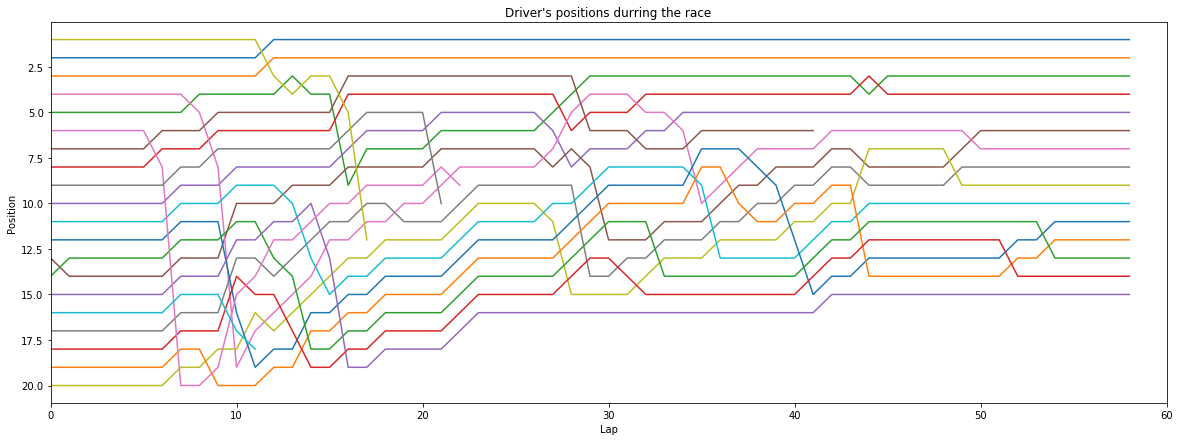

In [41]:
plt.plot(lap_positions)
plt.title("Driver's positions durring the race")
plt.xlabel("Lap")
plt.ylabel("Position")
plt.grid = True
plt.xlim([0,laps_total])
plt.gca().invert_yaxis()
plt.show()

Procesing the results